# Bike sharing assignment

# Step 1: Importing libraries

In [1]:
#Importing important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

from math import sqrt

In [2]:
#Warnings
import warnings
warnings.filterwarnings('ignore')

# Step 2: Reading and understanding the data

In [3]:
bike = pd.read_csv("C:/Users/rikit/Downloads/day.csv")
bike

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        1           1   
1          2  02-01-2018       1   0     1        0        2           1   
2          3  03-01-2018       1   0     1        0        3           1   
3          4  04-01-2018       1   0     1        0        4           1   
4          5  05-01-2018       1   0     1        0        5           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        5           1   
726      727  28-12-2019       1   1    12        0        6           0   
727      728  29-12-2019       1   1    12        0        0           0   
728      729  30-12-2019       1   1    12        0        1           1   
729      730  31-12-2019       1   1    12        0        2           1   

     weathersit       temp     atemp      hum  windspeed  casual  registered  \
0             2  14.110847  18.18125  80.5833  10.749882     331         654   
1             2  14.902598  17.68695  69.6087  16.652113     131         670   
2             1   8.050924   9.47025  43.7273  16.636703     120        1229   
3             1   8.200000  10.60610  59.0435  10.739832     108        1454   
4             1   9.305237  11.46350  43.6957  12.522300      82        1518   
..          ...        ...       ...      ...        ...     ...         ...   
725           2  10.420847  11.33210  65.2917  23.458911     247        1867   
726           2  10.386653  12.75230  59.0000  10.416557     644        2451   
727           2  10.386653  12.12000  75.2917   8.333661     159        1182   
728           1  10.489153  11.58500  48.3333  23.500518     364        1432   
729           2   8.849153  11.17435  57.7500  10.374682     439        2290   

      cnt  
0     985  
1     801  
2    1349  
3    1562  
4    1600  
..    ...  
725  2114  
726  3095  
727  1341  
728  1796  
729  2729  

[730 rows x 16 columns]

In [4]:
bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [5]:
bike.shape

(730, 16)

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

# Step 3: Checking for null values

In [8]:
# percentage of missing values in each column
round(100*(bike.isnull().sum()/len(bike)), 2).sort_values(ascending=False)


instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [9]:
# row-wise null count percentage
round((bike.isnull().sum(axis=1)/len(bike))*100,2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

# Step 4: Visualising the data

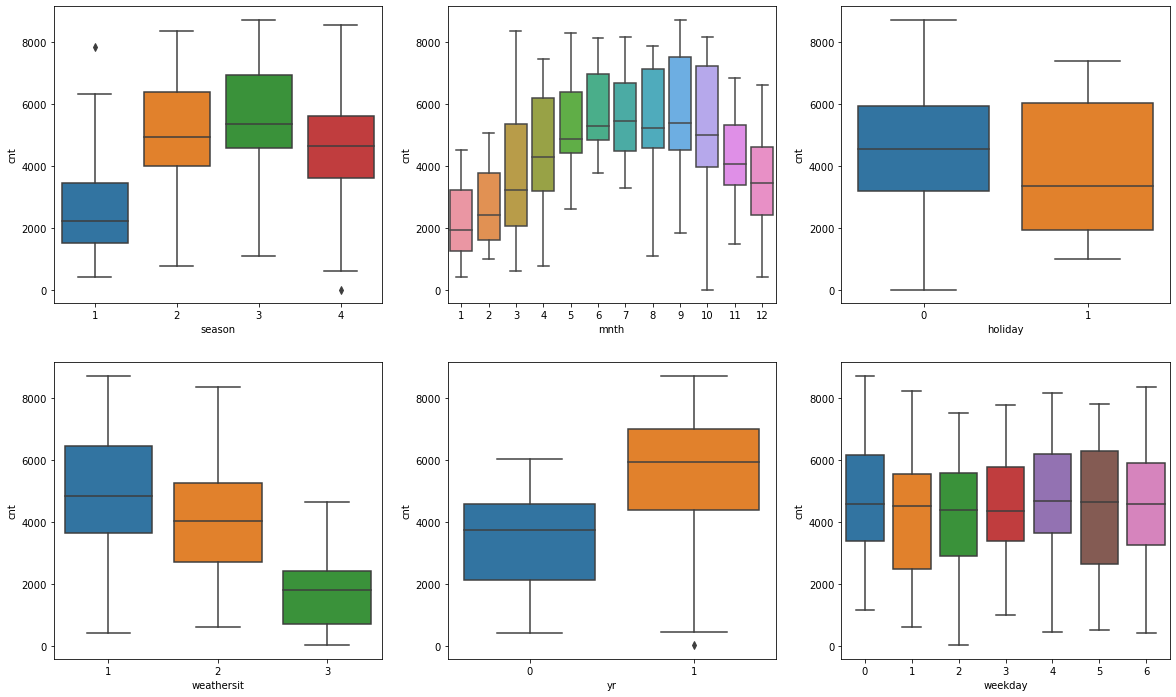

In [10]:
#boxplot for predictor variables and target varaible cnt
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.show()

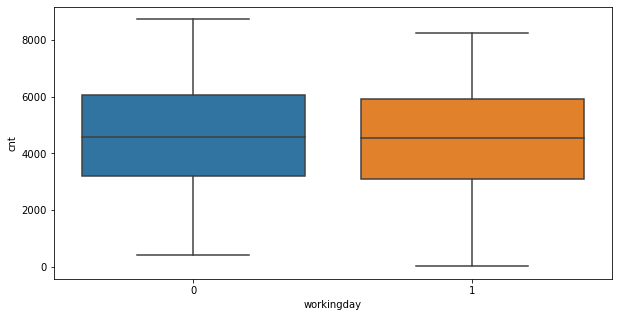

In [11]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

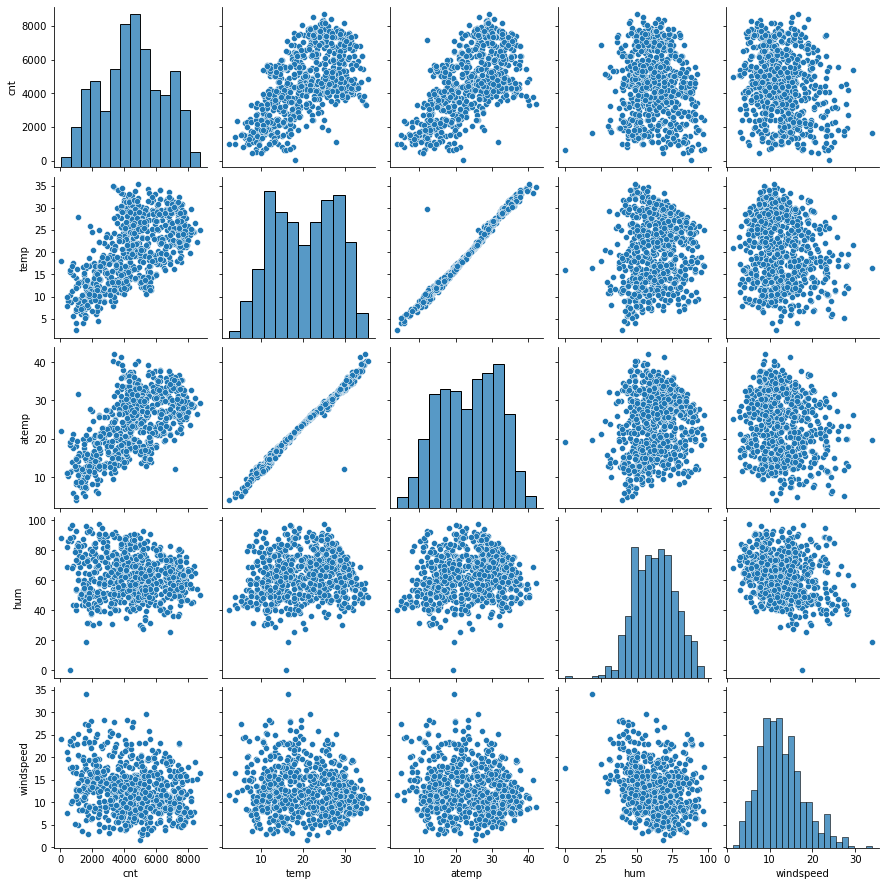

In [12]:
#pairplot for cnt, temp, atemp, hum, windspeed
sns.pairplot(data=bike, vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

# Step 5: Data Preparation

In [13]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [14]:
# dropping columns that are irrelevant for the model 
bike.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace = True)
bike.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        1           1           2  14.110847   
1       1   0     1        0        2           1           2  14.902598   
2       1   0     1        0        3           1           1   8.050924   
3       1   0     1        0        4           1           1   8.200000   
4       1   0     1        0        5           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [15]:
bike.season = bike.season.astype("category")
bike.weathersit = bike.weathersit.astype("category")
bike.mnth = bike.mnth.astype("category")
bike.weekday = bike.weekday.astype("category")

# Step 6: Dummy variables

In [16]:
# creating dummy variables for season, mnth, weathersit, weekday
bike = pd.get_dummies(bike, drop_first=True)

In [17]:
bike.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           1  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           1  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   season_2  season_3  ...  mnth_11  mnth_12  weekday_1  weekday_2  weekday_3  \
0         0         0  ...        0        0          1          0          0   
1         0         0  ...        0        0          0          1          0   
2         0         0  ...        0        0          0          0          1   
3         0         0  ...        0        0          0          0          0   
4         0         0  ...        0        0          0          0          0   

   weekday_4  weekday_5  weekday_6  weathersit_2  weathersit_3  
0          0          0          0             1             0  
1          0          0          0             1             0  
2          0          0          0             0             0  
3          1          0          0             0             0  
4          0          1          0             0             0  

[5 rows x 30 columns]

In [18]:
bike.shape

(730, 30)

# Step 7: Splitting the data into train and test sets

In [19]:
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 42)

# Step 8: Rescaling the features

In [20]:
scaler = MinMaxScaler()

In [21]:
# Apply scaler() to all the columns except the 'dummy' variables.
num_vars = ['cnt','hum','windspeed','temp']

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [22]:
bike_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
683   1        0           1  0.327133  16.22460  0.639330   0.327101   
645   1        1           0  0.403972  19.38040  0.731215   0.419004   
163   0        0           1  0.717562  30.08270  0.509660   0.708724   
360   0        0           1  0.331287  16.38165  0.785745   0.415925   
640   1        0           1  0.745598  29.95665  0.817947   0.110593   

          cnt  season_2  season_3  ...  mnth_11  mnth_12  weekday_1  \
683  0.605336         0         0  ...        1        0          0   
645  0.609320         0         0  ...        0        0          0   
163  0.554026         1         0  ...        0        0          0   
360  0.088253         0         0  ...        0        1          0   
640  0.862127         0         0  ...        0        0          0   

     weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  weathersit_2  \
683          0          0          0          1          0             1   
645          1          0          0          0          0             1   
163          0          1          0          0          0             0   
360          0          0          1          0          0             1   
640          0          0          1          0          0             1   

     weathersit_3  
683             0  
645             0  
163             0  
360             0  
640             0  

[5 rows x 30 columns]

In [23]:
bike_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.521569    0.027451    0.698039    0.551091   24.015409    0.653801   
std      0.500025    0.163554    0.459559    0.227401    8.119292    0.143542   
min      0.000000    0.000000    0.000000    0.000000    3.953480    0.000000   
25%      0.000000    0.000000    0.000000    0.354176   17.383900    0.544033   
50%      1.000000    0.000000    1.000000    0.575824   25.473225    0.659296   
75%      1.000000    0.000000    1.000000    0.745338   30.556050    0.756762   
max      1.000000    1.000000    1.000000    1.000000   42.044800    1.000000   

        windspeed         cnt    season_2    season_3  ...     mnth_11  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.414566    0.498206    0.256863    0.260784  ...    0.092157   
std      0.185671    0.233905    0.437332    0.439494  ...    0.289531   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.281934    0.345950    0.000000    0.000000  ...    0.000000   
50%      0.383964    0.502233    0.000000    0.000000  ...    0.000000   
75%      0.525698    0.677080    1.000000    1.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

          mnth_12   weekday_1   weekday_2   weekday_3   weekday_4   weekday_5  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.074510    0.149020    0.156863    0.133333    0.135294    0.149020   
std      0.262857    0.356457    0.364028    0.340268    0.342373    0.356457   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        weekday_6  weathersit_2  weathersit_3  
count  510.000000    510.000000    510.000000  
mean     0.143137      0.345098      0.029412  
std      0.350557      0.475867      0.169124  
min      0.000000      0.000000      0.000000  
25%      0.000000      0.000000      0.000000  
50%      0.000000      0.000000      0.000000  
75%      0.000000      1.000000      0.000000  
max      1.000000      1.000000      1.000000  

[8 rows x 30 columns]

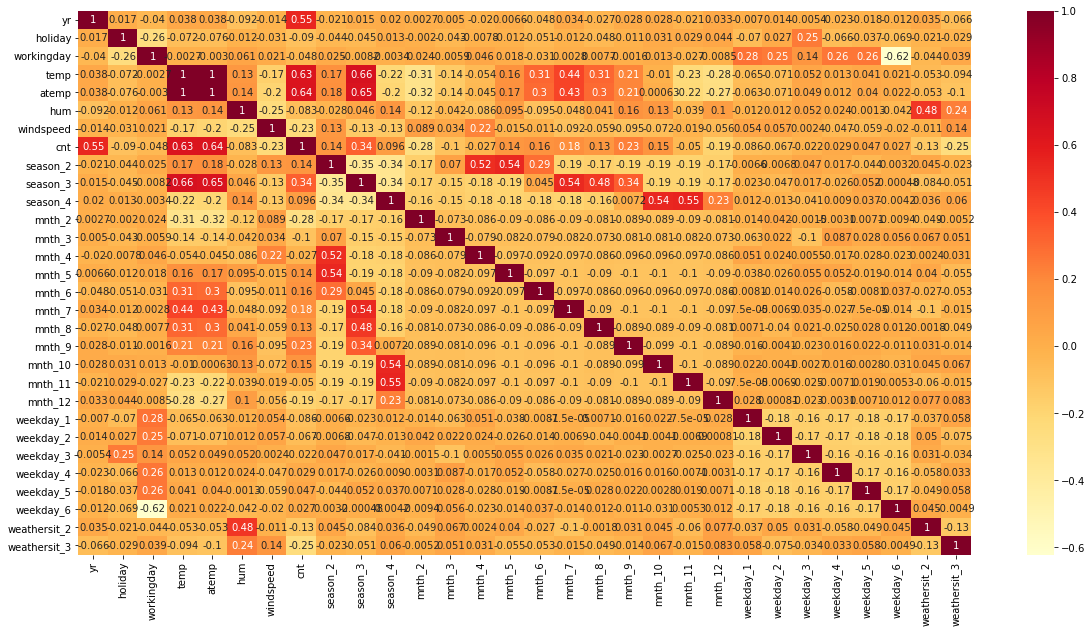

In [24]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (20, 10))
sns.heatmap(bike_train.corr(), annot = True, cmap='YlOrRd')
plt.show()

# Step 9: Dividing into X and Y sets for the model building

In [25]:
y_train = bike_train.pop('cnt')
X_train = bike_train

# Step 10: Building a linear model

In [26]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [27]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 10),
 ('temp', True, 1),
 ('atemp', False, 9),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 7),
 ('mnth_3', True, 1),
 ('mnth_4', False, 15),
 ('mnth_5', False, 3),
 ('mnth_6', False, 8),
 ('mnth_7', True, 1),
 ('mnth_8', False, 12),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', True, 1),
 ('mnth_12', False, 2),
 ('weekday_1', False, 4),
 ('weekday_2', False, 6),
 ('weekday_3', False, 5),
 ('weekday_4', False, 13),
 ('weekday_5', False, 14),
 ('weekday_6', False, 11),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [28]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_7', 'mnth_9', 'mnth_10', 'mnth_11',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [29]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_2', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_8',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6'],
      dtype='object')

In [30]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Model 1

In [31]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2           temp  25.28
3            hum  15.51
6       season_3   7.93
7       season_4   6.16
4      windspeed   4.58
5       season_2   4.21
12       mnth_11   2.63
11       mnth_10   2.55
13  weathersit_2   2.09
0             yr   2.04
9         mnth_7   1.88
10        mnth_9   1.62
14  weathersit_3   1.22
8         mnth_3   1.16
1        holiday   1.05

In [32]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [33]:
# Create a first fitted model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [34]:
# Check the parameters obtained
lm.params

const           0.176475
yr              0.235485
holiday        -0.081491
temp            0.469217
hum            -0.171116
windspeed      -0.128243
season_2        0.163011
season_3        0.125525
season_4        0.189409
mnth_3          0.051421
mnth_7         -0.038203
mnth_9          0.088505
mnth_10         0.067992
mnth_11        -0.016682
weathersit_2   -0.058411
weathersit_3   -0.226601
dtype: float64

In [35]:
# Print a summary of the linear regression model obtained
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     172.7
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          2.24e-185
Time:                        16:39:11   Log-Likelihood:                 484.86
No. Observations:                 510   AIC:                            -937.7
Df Residuals:                     494   BIC:                            -870.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1765      0.031      5.667   

# Model 2

In [36]:
X_train_new = X_train_rfe.drop(["hum"], axis = 1)

In [37]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0          const  54.78
7       season_3   5.90
8       season_4   4.62
3           temp   3.90
6       season_2   3.14
13       mnth_11   2.39
12       mnth_10   2.34
4            hum   1.86
10        mnth_7   1.71
14  weathersit_2   1.58
11        mnth_9   1.49
15  weathersit_3   1.30
5      windspeed   1.22
9         mnth_3   1.11
1             yr   1.03
2        holiday   1.02

In [38]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.6
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.23e-182
Time:                        16:39:11   Log-Likelihood:                 475.61
No. Observations:                 510   AIC:                            -921.2
Df Residuals:                     495   BIC:                            -857.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0719      0.020      3.672      0.000       0.033       0.110
yr               0.2405      0.009     27.906      0.000       0.224       0.257
holiday         -0.0831      0.026     -3.140      0.002      -0.135      -0.031
temp             0.4444      0.037     12.098      0.000       0.372       0.517
windspeed       -0.0962      0.024     -3.962      0.000      -0.144      -0.048
season_2         0.1663      0.017      9.585      0.000       0.132       0.200
season_3         0.1302      0.024      5.504      0.000       0.084       0.177
season_4         0.1872      0.021      8.821      0.000       0.146       0.229
mnth_3           0.0567      0.019      3.053      0.002       0.020       0.093
mnth_7          -0.0332      0.019     -1.719      0.086      -0.071       0.005
mnth_9           0.0813      0.018      4.476      0.000       0.046       0.117
mnth_10          0.0661      0.023      2.892      0.004       0.021       0.111
mnth_11         -0.0164      0.023     -0.719      0.472      -0.061       0.028
weathersit_2    -0.0858      0.009     -9.288      0.000      -0.104      -0.068
weathersit_3    -0.2772      0.026    -10.568      0.000      -0.329      -0.226
==============================================================================
Omnibus:                       76.533   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.266
Skew:                          -0.825   Prob(JB):                     9.58e-36
Kurtosis:                       5.207   Cond. No.                         15.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model 3

In [39]:
X_train_new = X_train_new.drop(["season_3"], axis = 1)

In [40]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0          const  20.14
6       season_4   3.47
10       mnth_10   2.34
11       mnth_11   2.31
3           temp   1.73
8         mnth_7   1.62
5       season_2   1.49
9         mnth_9   1.36
4      windspeed   1.11
7         mnth_3   1.08
13  weathersit_3   1.07
12  weathersit_2   1.05
2        holiday   1.02
1             yr   1.01

In [41]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     178.3
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          2.03e-177
Time:                        16:39:12   Log-Likelihood:                 460.46
No. Observations:                 510   AIC:                            -892.9
Df Residuals:                     496   BIC:                            -833.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0510      0.020      2.580      0.010       0.012       0.090
yr               0.2390      0.009     26.961      0.000       0.222       0.256
holiday         -0.0906      0.027     -3.333      0.001      -0.144      -0.037
temp             0.5934      0.026     23.242      0.000       0.543       0.644
windspeed       -0.0967      0.025     -3.872      0.000      -0.146      -0.048
season_2         0.0971      0.012      7.890      0.000       0.073       0.121
season_4         0.1289      0.019      6.812      0.000       0.092       0.166
mnth_3           0.0401      0.019      2.126      0.034       0.003       0.077
mnth_7          -0.0098      0.019     -0.505      0.614      -0.048       0.028
mnth_9           0.1090      0.018      6.070      0.000       0.074       0.144
mnth_10          0.0643      0.024      2.736      0.006       0.018       0.111
mnth_11          0.0060      0.023      0.258      0.797      -0.040       0.051
weathersit_2    -0.0844      0.009     -8.883      0.000      -0.103      -0.066
weathersit_3    -0.2672      0.027     -9.922      0.000      -0.320      -0.214
==============================================================================
Omnibus:                       51.765   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.625
Skew:                          -0.649   Prob(JB):                     5.69e-20
Kurtosis:                       4.576   Cond. No.                         12.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model 4

In [42]:
X_train_new = X_train_new.drop(["mnth_11"], axis = 1)

In [43]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0          const  20.14
6       season_4   1.74
3           temp   1.73
8         mnth_7   1.62
10       mnth_10   1.53
5       season_2   1.49
9         mnth_9   1.29
4      windspeed   1.10
7         mnth_3   1.08
12  weathersit_3   1.06
11  weathersit_2   1.04
2        holiday   1.02
1             yr   1.01

In [44]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [45]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [46]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     193.6
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.47e-178
Time:                        16:39:12   Log-Likelihood:                 460.43
No. Observations:                 510   AIC:                            -894.9
Df Residuals:                     497   BIC:                            -839.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0510      0.020      2.584      0.010       0.012       0.090
yr               0.2389      0.009     26.990      0.000       0.222       0.256
holiday         -0.0903      0.027     -3.327      0.001      -0.144      -0.037
temp             0.5935      0.026     23.273      0.000       0.543       0.644
windspeed       -0.0963      0.025     -3.867      0.000      -0.145      -0.047
season_2         0.0969      0.012      7.896      0.000       0.073       0.121
season_4         0.1324      0.013      9.875      0.000       0.106       0.159
mnth_3           0.0400      0.019      2.126      0.034       0.003       0.077
mnth_7          -0.0100      0.019     -0.518      0.605      -0.048       0.028
mnth_9           0.1079      0.017      6.181      0.000       0.074       0.142
mnth_10          0.0608      0.019      3.200      0.001       0.023       0.098
weathersit_2    -0.0846      0.009     -8.956      0.000      -0.103      -0.066
weathersit_3    -0.2676      0.027     -9.970      0.000      -0.320      -0.215
==============================================================================
Omnibus:                       51.213   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.377
Skew:                          -0.645   Prob(JB):                     1.06e-19
Kurtosis:                       4.565   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model 5

In [47]:
X_train_new = X_train_new.drop(["mnth_7"], axis = 1)

In [48]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0          const  19.74
6       season_4   1.71
9        mnth_10   1.50
3           temp   1.28
5       season_2   1.23
8         mnth_9   1.15
4      windspeed   1.10
7         mnth_3   1.08
11  weathersit_3   1.06
10  weathersit_2   1.04
1             yr   1.01
2        holiday   1.01

In [49]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     211.5
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.13e-179
Time:                        16:39:12   Log-Likelihood:                 460.29
No. Observations:                 510   AIC:                            -896.6
Df Residuals:                     498   BIC:                            -845.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0525      0.020      2.686      0.007       0.014       0.091
yr               0.2388      0.009     27.006      0.000       0.221       0.256
holiday         -0.0904      0.027     -3.336      0.001      -0.144      -0.037
temp             0.5868      0.022     26.804      0.000       0.544       0.630
windspeed       -0.0961      0.025     -3.863      0.000      -0.145      -0.047
season_2         0.0995      0.011      8.916      0.000       0.078       0.121
season_4         0.1333      0.013     10.040      0.000       0.107       0.159
mnth_3           0.0404      0.019      2.150      0.032       0.003       0.077
mnth_9           0.1110      0.016      6.755      0.000       0.079       0.143
mnth_10          0.0621      0.019      3.300      0.001       0.025       0.099
weathersit_2    -0.0844      0.009     -8.949      0.000      -0.103      -0.066
weathersit_3    -0.2683      0.027    -10.014      0.000      -0.321      -0.216
==============================================================================
Omnibus:                       52.806   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.059
Skew:                          -0.662   Prob(JB):                     2.78e-20
Kurtosis:                       4.577   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model 6 - Final model

In [50]:
X_train_new = X_train_new.drop(["mnth_3"], axis = 1)

In [51]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0          const  18.98
6       season_4   1.67
8        mnth_10   1.50
3           temp   1.24
5       season_2   1.23
7         mnth_9   1.14
4      windspeed   1.10
10  weathersit_3   1.06
9   weathersit_2   1.04
1             yr   1.01
2        holiday   1.01

In [52]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     230.5
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          7.18e-180
Time:                        16:39:12   Log-Likelihood:                 457.94
No. Observations:                 510   AIC:                            -893.9
Df Residuals:                     499   BIC:                            -847.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0607      0.019      3.155      0.002       0.023       0.098
yr               0.2392      0.009     26.956      0.000       0.222       0.257
holiday         -0.0936      0.027     -3.445      0.001      -0.147      -0.040
temp             0.5786      0.022     26.740      0.000       0.536       0.621
windspeed       -0.0982      0.025     -3.935      0.000      -0.147      -0.049
season_2         0.1002      0.011      8.950      0.000       0.078       0.122
season_4         0.1287      0.013      9.787      0.000       0.103       0.155
mnth_9           0.1097      0.016      6.656      0.000       0.077       0.142
mnth_10          0.0627      0.019      3.325      0.001       0.026       0.100
weathersit_2    -0.0830      0.009     -8.789      0.000      -0.102      -0.064
weathersit_3    -0.2650      0.027     -9.870      0.000      -0.318      -0.212
==============================================================================
Omnibus:                       53.821   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.743
Skew:                          -0.665   Prob(JB):                     4.40e-21
Kurtosis:                       4.626   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

cnt = 0.0607 + 0.1002 * season_2 + 

# Step 11: Residual analysis of the train data

In [53]:
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

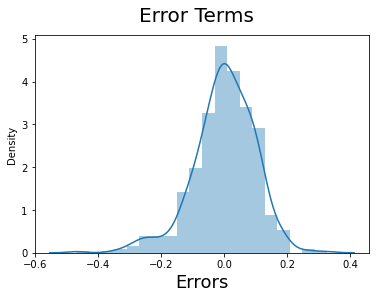

In [54]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

# Step 12: Making predictions using the final model

In [55]:
#Applying the scaling on the test sets
num_vars = ['cnt','hum','windspeed','temp']


bike_test[num_vars] = scaler.transform(bike_test[num_vars])

In [56]:
bike_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.452055    0.031963    0.671233    0.527468   23.066174    0.629546   
std      0.498836    0.176306    0.470841    0.229936    8.218533    0.152584   
min      0.000000    0.000000    0.000000    0.047675    5.896500    0.193646   
25%      0.000000    0.000000    0.000000    0.324018   15.940600    0.520479   
50%      0.000000    0.000000    1.000000    0.507811   22.852300    0.608416   
75%      1.000000    0.000000    1.000000    0.726388   30.047100    0.735901   
max      1.000000    1.000000    1.000000    0.970925   39.741450    1.002146   

        windspeed         cnt    season_2    season_3  ...     mnth_11  \
count  219.000000  219.000000  219.000000  219.000000  ...  219.000000   
mean     0.435511    0.479553    0.237443    0.251142  ...    0.059361   
std      0.212750    0.233091    0.426491    0.434663  ...    0.236840   
min      0.060760   -0.049378    0.000000    0.000000  ...    0.000000   
25%      0.281156    0.285826    0.000000    0.000000  ...    0.000000   
50%      0.416900    0.471206    0.000000    0.000000  ...    0.000000   
75%      0.534288    0.644151    0.000000    0.500000  ...    0.000000   
max      1.214955    0.980804    1.000000    1.000000  ...    1.000000   

          mnth_12   weekday_1   weekday_2   weekday_3   weekday_4   weekday_5  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.109589    0.132420    0.114155    0.164384    0.159817    0.123288   
std      0.313092    0.339723    0.318728    0.371472    0.367276    0.329520   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        weekday_6  weathersit_2  weathersit_3  
count  219.000000    219.000000    219.000000  
mean     0.141553      0.315068      0.027397  
std      0.349389      0.465607      0.163612  
min      0.000000      0.000000      0.000000  
25%      0.000000      0.000000      0.000000  
50%      0.000000      0.000000      0.000000  
75%      0.000000      1.000000      0.000000  
max      1.000000      1.000000      1.000000  

[8 rows x 30 columns]

In [57]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [58]:
X_test = sm.add_constant(X_test)

In [59]:
# predicting using values used by the final model
test_col = X_train_lm.columns
X_test=X_test[test_col[1:]]
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 468 to 314
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   holiday       219 non-null    int64  
 3   temp          219 non-null    float64
 4   windspeed     219 non-null    float64
 5   season_2      219 non-null    uint8  
 6   season_4      219 non-null    uint8  
 7   mnth_9        219 non-null    uint8  
 8   mnth_10       219 non-null    uint8  
 9   weathersit_2  219 non-null    uint8  
 10  weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.5 KB


In [60]:
# Making predictions using the seventh model
y_pred = lm.predict(X_test)

In [61]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8182483185847441

In [62]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

0.009829753580983846

# Step 13: Model Evaluation

Text(0, 0.5, 'y_pred')

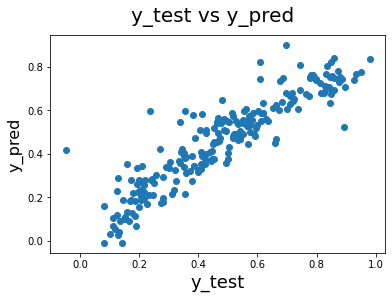

In [63]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [64]:
param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,11))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

Variables  Coefficient value
index                                 
3              temp           0.578649
1                yr           0.239155
6          season_4           0.128732
7            mnth_9           0.109654
5          season_2           0.100245
8           mnth_10           0.062737
0             const           0.060675
9      weathersit_2          -0.083006
2           holiday          -0.093594
4         windspeed          -0.098158
10     weathersit_3          -0.264963

1. Variable temp has the highest coeffecient value, thus making it the significant variable among all the variables.
2. The month of September has a positive value while month of July has a negative value which means month of September had high bike rentals but bike rentals decreased in month of July.
3. Holidays has a negative value which clearly means the rentals decreased during holidays.

Temperature, weathersit_3 and yr has a major impact on bike rentals making it increase or decrease.

